<a href="https://colab.research.google.com/github/AdityaVerma2809/Data-Science-Club-Task/blob/main/Task_1_DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

100%|██████████| 2.84k/2.84k [00:00<00:00, 4.38MB/s]

Extracting files...


In [3]:
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (350, 11)


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Data Cleaning & Feature Engineering

In [5]:
df.columns = [c.replace(' ', '_') for c in df.columns]

df['Avg_Item_Value'] = df['Total_Spend'] / df['Items_Purchased']

df['High_Spender'] = df['Total_Spend'] > df['Total_Spend'].quantile(0.75)

sat_map = {'Satisfied': 3, 'Neutral': 2, 'Unsatisfied': 1}
df['Satisfaction_Numeric'] = df['Satisfaction_Level'].map(sat_map)

print("Data cleaning and feature engineering complete.")

Data cleaning and feature engineering complete.


# Data Exploration (EDA)

We start with a heatmap to see which variables move together. For instance, does a higher discount lead to more items purchased?

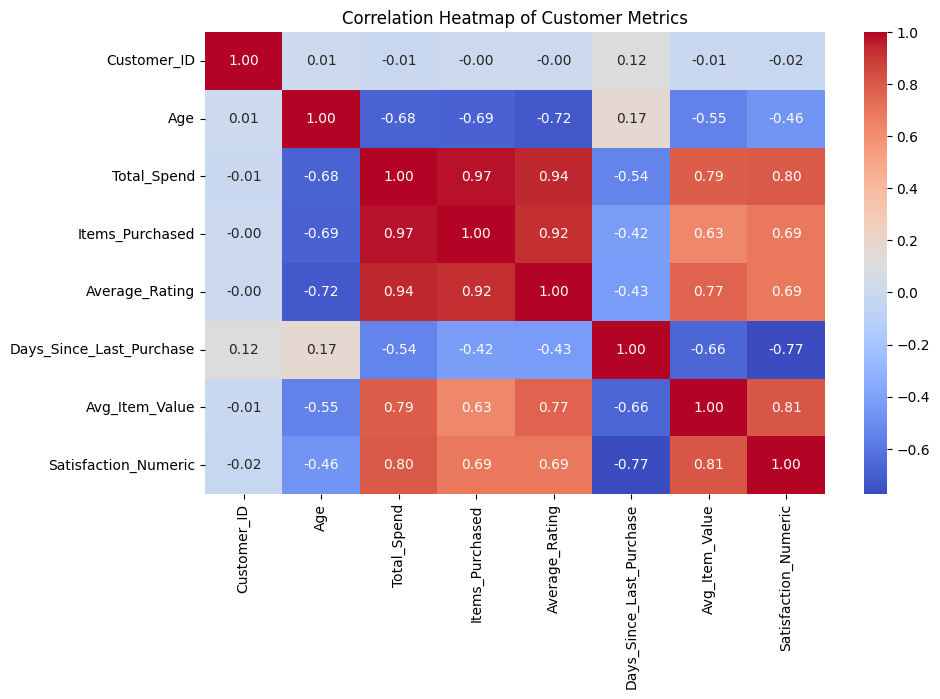

In [6]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Customer Metrics')
plt.show()

Membership Impact on Revenue

/tmp/ipython-input-777852023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='Membership_Type', y='Total_Spend', data=df, palette='Set2')# Subplot 1: Total Spend vs Membership


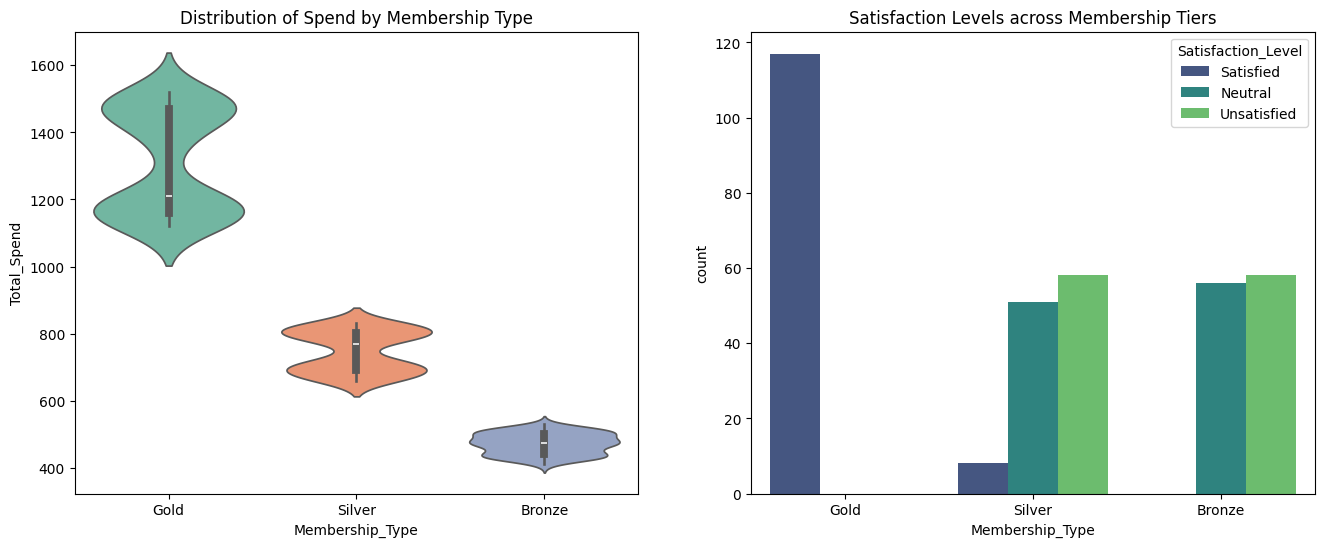

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(ax=axes[0], x='Membership_Type', y='Total_Spend', data=df, palette='Set2')# Subplot 1: Total Spend vs Membership
axes[0].set_title('Distribution of Spend by Membership Type')

sns.countplot(ax=axes[1], x='Membership_Type', hue='Satisfaction_Level', data=df, palette='viridis')# Subplot 2: Satisfaction vs Membership
axes[1].set_title('Satisfaction Levels across Membership Tiers')
plt.show()

Demographic Analysis (Age & Gender)

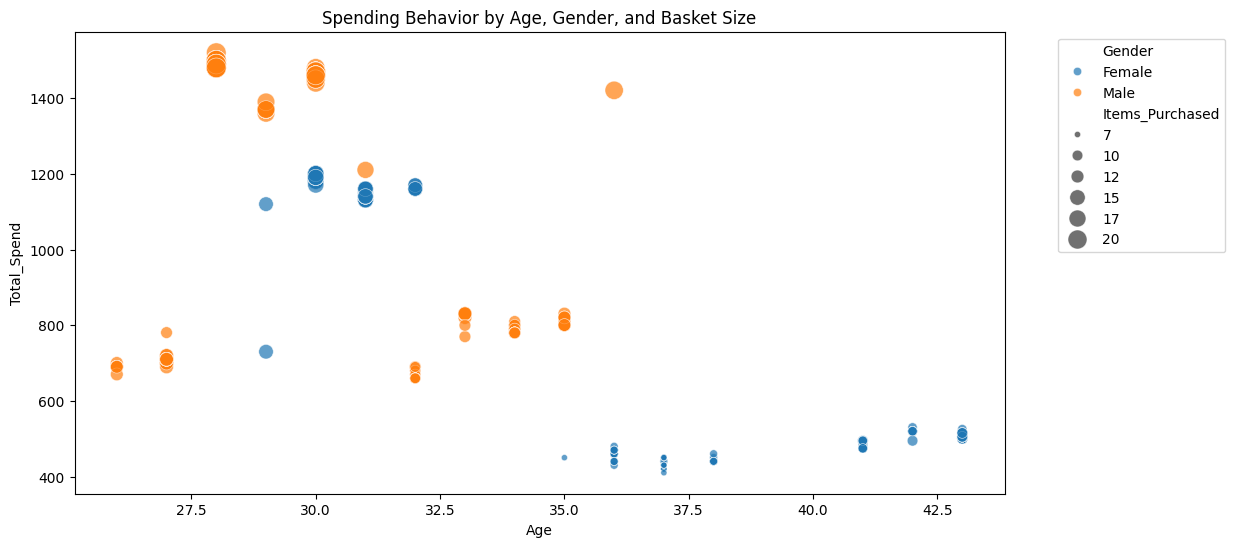

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Total_Spend', hue='Gender', size='Items_Purchased', sizes=(20, 200), alpha=0.7)
plt.title('Spending Behavior by Age, Gender, and Basket Size')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

The Discount Effect

/tmp/ipython-input-566836233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount_Applied', y='Items_Purchased', data=df, palette='Set1')


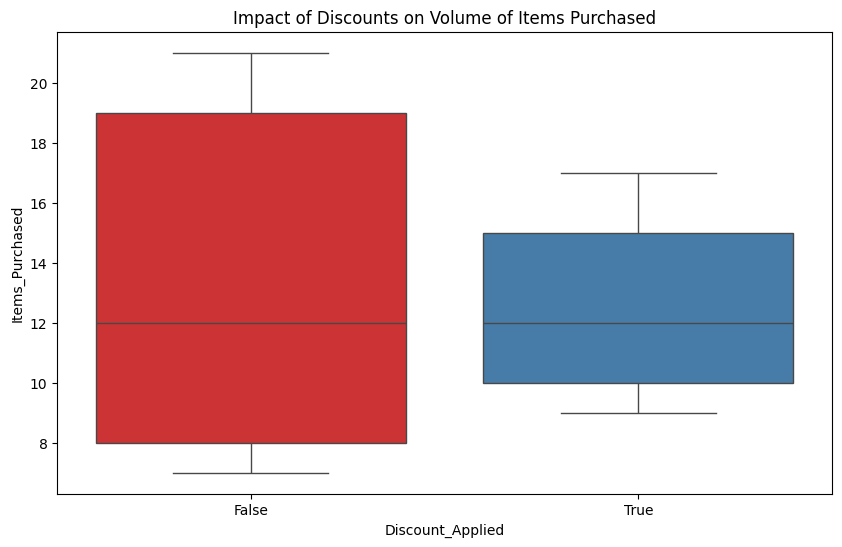

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount_Applied', y='Items_Purchased', data=df, palette='Set1')
plt.title('Impact of Discounts on Volume of Items Purchased')
plt.show()

 Actionable Insights Summary
 1. **The Membership Floor:** The violin plot shows that **Gold Members** have a much higher "spending floor" ($600+) compared to others. **Insight:** Gold membership is the strongest predictor of high-revenue stability.
 2. **Discount Sensitivity:** The boxplot confirms that discounts significantly increase the volume of items purchased. **Insight:** Since correlation with total spend is high, discounts are not "cannibalizing" profits but are successfully increasing basket size.
 3. **Age Neutrality:** Unlike many retail datasets, spending appears relatively stable across the 25-45 age range. **Insight:** Marketing should focus on **Membership Status** and **Satisfaction** rather than broad age-based demographics.